In [1]:
# Importing all the important libraries for this lab :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import random as rd # for generating random numbers
import math

from sklearn.preprocessing import StandardScaler # Used to scale the data
from sklearn.preprocessing import LabelEncoder # convert categories to numbers
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.cluster import KMeans # for kmeans clustering
from sklearn import metrics
from sklearn.neural_network import MLPClassifier # for neural network
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import tensorflow as tf # This library is used for Machine Learning related coding
from tensorflow import keras # Specifically used to work with Neural Networks
from tensorflow.keras import layers # Layer is the building block for a neural network

In [2]:
def onehot_encode(df):
    encodefamh = pd.get_dummies(df['famhist'])  # Encoding family history (famhist) column and stores the data as an indicator variable
    df = df.drop('famhist', axis=1)  # Drop non-encoded famhist value.
    df = df.join(encodefamh)  # Add encoded famhist value.
    return df

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df = onehot_encode(df)
x = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'Absent', 'Present']]
y = df[['chd']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 40)

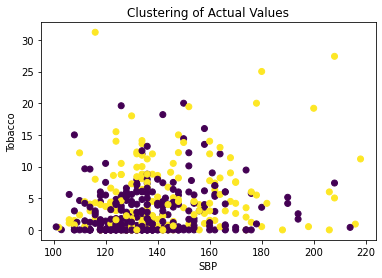

In [4]:

targ_val=df['chd']
plt.scatter(df['sbp'],df['tobacco'],c=targ_val)
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.title('Clustering of Actual Values')
plt.show()

0.6190476190476191


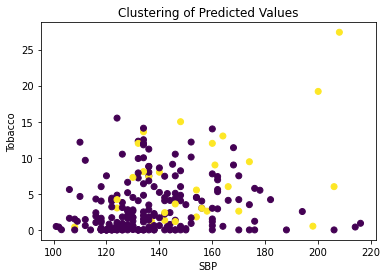

In [5]:
# Q3
kmeans_model = KMeans(n_clusters=2, random_state= 40).fit(x_train)
predicts = kmeans_model.predict(x_test)

# Q1 
print(accuracy_score(y_test, predicts))

plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=predicts)
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.title('Clustering of Predicted Values')
plt.show()

In [6]:
print(predicts)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


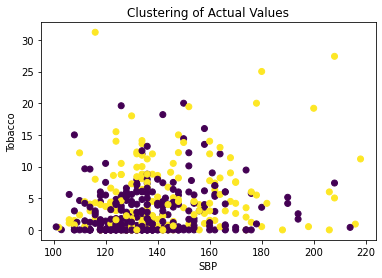

Epoch 1/35
20/20 [==============================] - 1s 7ms/step - loss: 0.6018
Epoch 2/35
20/20 [==============================] - 0s 7ms/step - loss: 0.5307
Epoch 3/35
20/20 [==============================] - 0s 6ms/step - loss: 0.5119
Epoch 4/35
20/20 [==============================] - 0s 7ms/step - loss: 0.4810
Epoch 5/35
20/20 [==============================] - 0s 7ms/step - loss: 0.4534
Epoch 6/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4330
Epoch 7/35
20/20 [==============================] - 0s 7ms/step - loss: 0.4129
Epoch 8/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4021
Epoch 9/35
20/20 [==============================] - 0s 6ms/step - loss: 0.3763
Epoch 10/35
20/20 [==============================] - 0s 6ms/step - loss: 0.3255
Epoch 11/35
20/20 [==============================] - 0s 7ms/step - loss: 0.3053
Epoch 12/35
20/20 [==============================] - 0s 6ms/step - loss: 0.2870
Epoch 13/35
20/20 [==============================

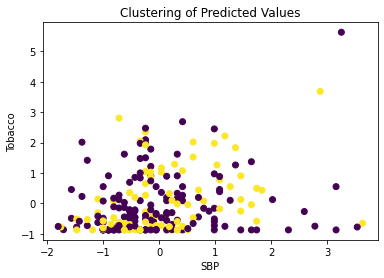

In [7]:
#Q4 Q5 Q6

targ_val=df['chd']
plt.scatter(df['sbp'],df['tobacco'],c=targ_val)
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.title('Clustering of Actual Values')
plt.show()
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 40)

standardize = StandardScaler()
x_train = standardize.fit_transform(x_train)
x_test = standardize.fit_transform(x_test) 

model = Sequential()
model.add(Dense(500, input_dim = 10, activation = 'relu')) 
model.add (Dense(500, activation = 'relu'))
model.add (Dense(128, activation = 'relu'))
model.add (Dense(2, activation = 'softmax')) 
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(x_train, y_train, epochs=35, batch_size = 12,)
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

print('Accuracy Score (%) ', accuracy_score(y_test, y_pred)*100) 
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.title('Clustering of Predicted Values')
plt.show()


In [8]:
#Principle Components Analysis
# Q8 Q9 Q10 and Q11
x = standardize.fit_transform(x)

components = PCA(n_components=10)
PC = components.fit_transform(x)
components.explained_variance_ratio_


array([3.07351880e-01, 1.75981159e-01, 1.19713113e-01, 1.05306112e-01,
       8.45566492e-02, 7.61562175e-02, 6.68583573e-02, 4.65879217e-02,
       1.74885896e-02, 2.29774119e-33])

In [9]:
# Now we are finding all the principal components and placing them into a dataframe
PCdf = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8', 'PC9','PC10' ] )
print(PCdf)

          PC1       PC2       PC3  ...       PC8       PC9          PC10
0    2.153375  0.921694  3.056830  ...  0.579049  0.413843 -6.479360e-17
1    0.241098 -1.409896 -0.697493  ... -1.216596  0.596161 -5.023590e-17
2    0.770033  1.428810 -1.045124  ... -0.495768 -0.248535  2.206799e-15
3    3.425242  0.064403  0.025228  ...  0.489901 -0.117837  2.525762e-16
4    1.600038  1.185435  1.887656  ...  0.468390 -0.216607  7.597217e-17
..        ...       ...       ...  ...       ...       ...           ...
457  1.474825 -2.109665 -0.525988  ... -0.290314  0.067441  3.254039e-17
458  0.969534 -1.931355  0.415127  ...  0.084658 -0.111794  1.100467e-16
459 -2.178174 -0.186814  1.689230  ... -1.333721  0.620922  1.108681e-16
460  0.700929 -1.378982 -1.717431  ...  0.034796 -0.226786  2.676159e-16
461 -0.024728  2.068502 -0.182549  ... -1.625823 -2.098216  9.148901e-17

[462 rows x 10 columns]


In [10]:
y = df[['chd']] # Data Split 
x_train, x_test, y_train, y_test = train_test_split(PCdf.iloc[:, np.r_[0:7]],y,test_size = 0.5, random_state = 40)

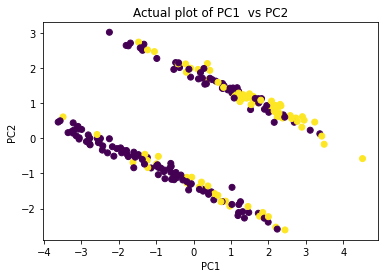

In [14]:
targ_val=y_test['chd']
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=targ_val) # Add .iloc because they are in pandas dataframe
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual plot of PC1  vs PC2')
plt.show()

In [15]:
kmeans_model = KMeans(n_clusters=2, random_state= 40).fit(x_train)
predicts = kmeans_model.predict(x_test)

0.6536796536796536


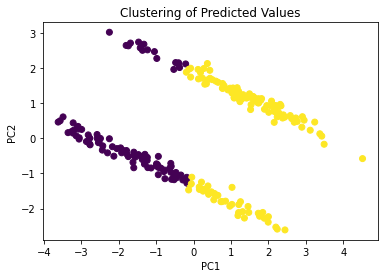

In [16]:
print(accuracy_score(y_test, predicts))

plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=predicts)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering of Predicted Values')
plt.show()

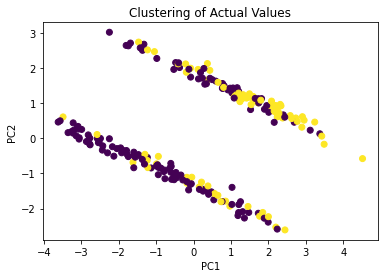

Epoch 1/35


ValueError: ignored

In [20]:
# Q12 Q13 and Q14 
y = to_categorical(df['chd'])
x_train, x_test, y_train, y_test = train_test_split(PCdf.iloc[:, np.r_[0:7]],y,test_size = 0.5, random_state = 40)

y_test = np.argmax(y_test, axis=1)
plt.scatter(x_test['PC1'],x_test['PC2'], c=y_test)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering of Actual Values')
plt.show()

y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(500, input_dim = 10, activation = 'relu')) 
model.add (Dense(500, activation = 'relu'))
model.add (Dense(128, activation = 'relu'))
model.add (Dense(2, activation = 'softmax')) 
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(x_train, y_train, epochs=35, batch_size = 12,)
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

print('Accuracy Score (%) ', accuracy_score(y_test, y_pred)*100) 
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.title('Clustering of Predicted Values')
plt.show()
